In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance/notebooks/diff_fairness_interventions_exp


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
EXPERIMENT_NAME = 'one_repair_lvl_many_models_law_school'
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
DATASET_NAME = 'Law_School'
SENSITIVE_ATTR_FOR_INTERVENTION = 'male&race'
EXPERIMENT_SESSION_UUID = 'adaeac61-1e2d-4f1c-ad7e-6a164a02d732'
SENSITIVE_ATTRS = ['male', 'race', 'male&race']
MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier', 'MLPClassifier']
# MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(228, 35)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,...,male_priv_correct,male_priv_incorrect,overall,race_dis,race_dis_correct,race_dis_incorrect,race_priv,race_priv_correct,race_priv_incorrect,Test_Set_Index
0,Accuracy,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Law_School,200,OK,2023-08-07 01:12:17.630,adaeac61-1e2d-4f1c-ad7e-6a164a02d732,...,1.000000,0.000000,0.899519,0.767241,1.000000,0.000000,0.926097,1.000000,0.000000,0
1,Accuracy,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Law_School,200,OK,2023-08-07 01:00:06.649,adaeac61-1e2d-4f1c-ad7e-6a164a02d732,...,1.000000,0.000000,0.904327,0.793103,1.000000,0.000000,0.926674,1.000000,0.000000,0
48,Aleatoric_Uncertainty,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Law_School,200,OK,2023-08-07 01:12:17.630,adaeac61-1e2d-4f1c-ad7e-6a164a02d732,...,0.299694,0.775917,0.334850,0.599199,0.514188,0.879421,0.281735,0.252029,0.653995,0
49,Aleatoric_Uncertainty,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Law_School,200,OK,2023-08-07 01:00:06.649,adaeac61-1e2d-4f1c-ad7e-6a164a02d732,...,0.297822,0.772524,0.333275,0.605706,0.537894,0.865653,0.278537,0.248995,0.651873,0
96,F1,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Law_School,200,OK,2023-08-07 01:12:17.630,adaeac61-1e2d-4f1c-ad7e-6a164a02d732,...,1.000000,0.000000,0.945388,0.846881,1.000000,0.000000,0.961189,1.000000,0.000000,0
97,F1,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Law_School,200,OK,2023-08-07 01:00:06.649,adaeac61-1e2d-4f1c-ad7e-6a164a02d732,...,1.000000,0.000000,0.947755,0.858824,1.000000,0.000000,0.961503,1.000000,0.000000,0
144,FNR,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Law_School,200,OK,2023-08-07 01:12:17.630,adaeac61-1e2d-4f1c-ad7e-6a164a02d732,...,0.000000,1.000000,0.019512,0.096774,0.000000,1.000000,0.007514,0.000000,1.000000,0
145,FNR,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Law_School,200,OK,2023-08-07 01:00:06.649,adaeac61-1e2d-4f1c-ad7e-6a164a02d732,...,0.000000,1.000000,0.021680,0.116935,0.000000,1.000000,0.006888,0.000000,1.000000,0
192,FPR,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Law_School,200,OK,2023-08-07 01:12:17.630,adaeac61-1e2d-4f1c-ad7e-6a164a02d732,...,0.000000,1.000000,0.736170,0.570000,0.000000,1.000000,0.859259,0.000000,1.000000,0
193,FPR,101,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Run_1,Law_School,200,OK,2023-08-07 01:00:06.649,adaeac61-1e2d-4f1c-ad7e-6a164a02d732,...,0.000000,1.000000,0.676596,0.430000,0.000000,1.000000,0.859259,0.000000,1.000000,0


In [11]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [13]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [14]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

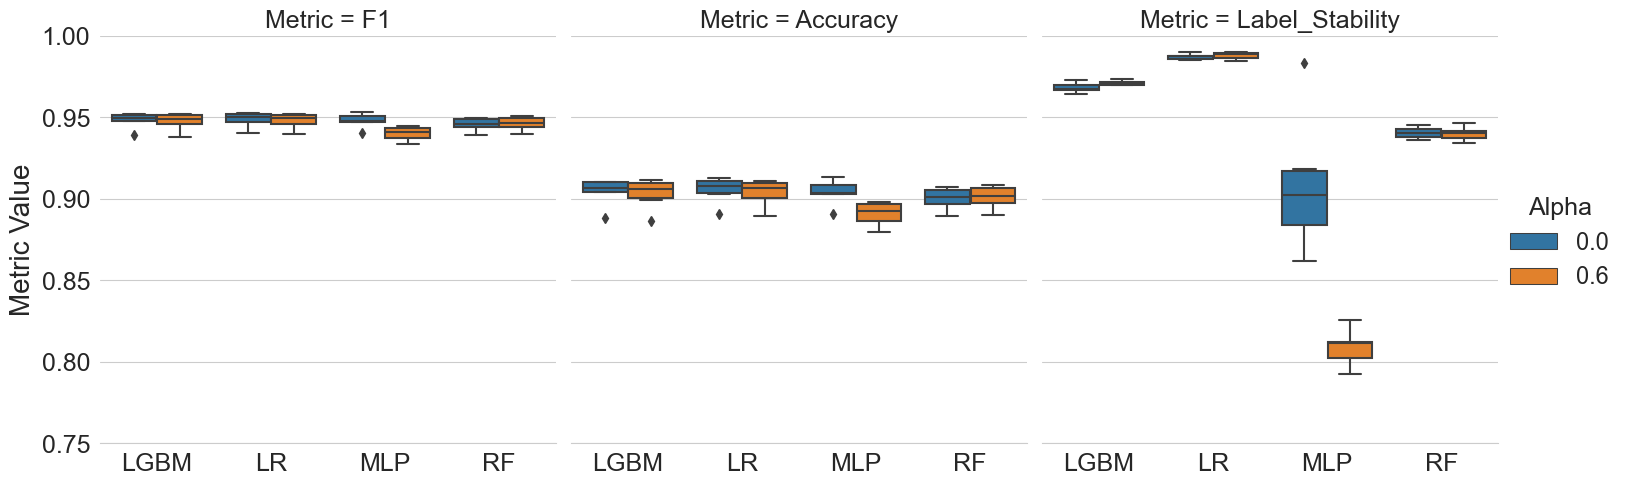

In [15]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.75, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

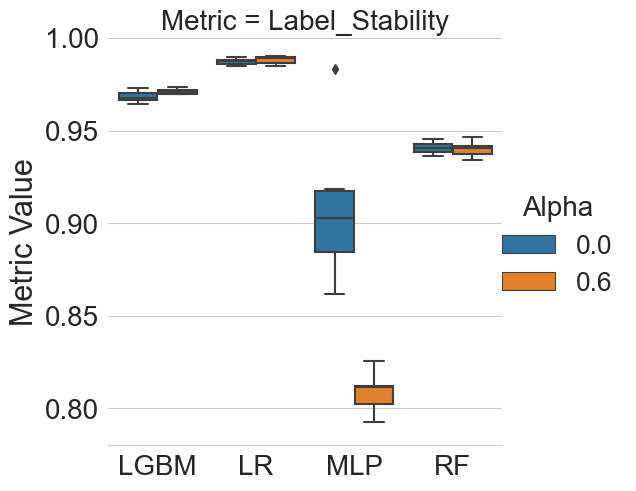

In [16]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.78, 1.00),
                                           metric_names=['Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

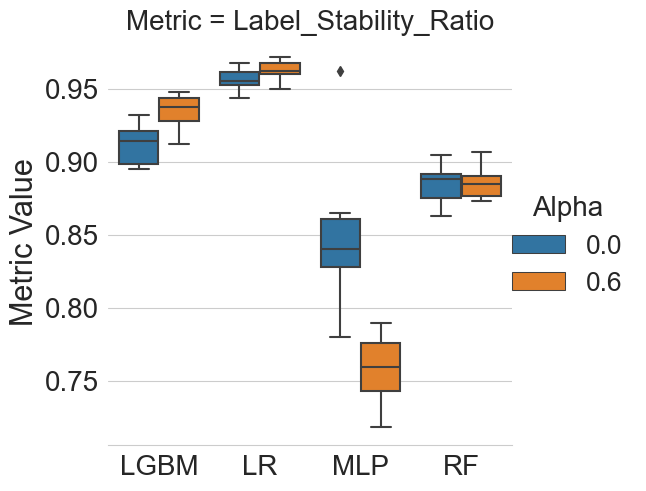

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Label_Stability_Ratio'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

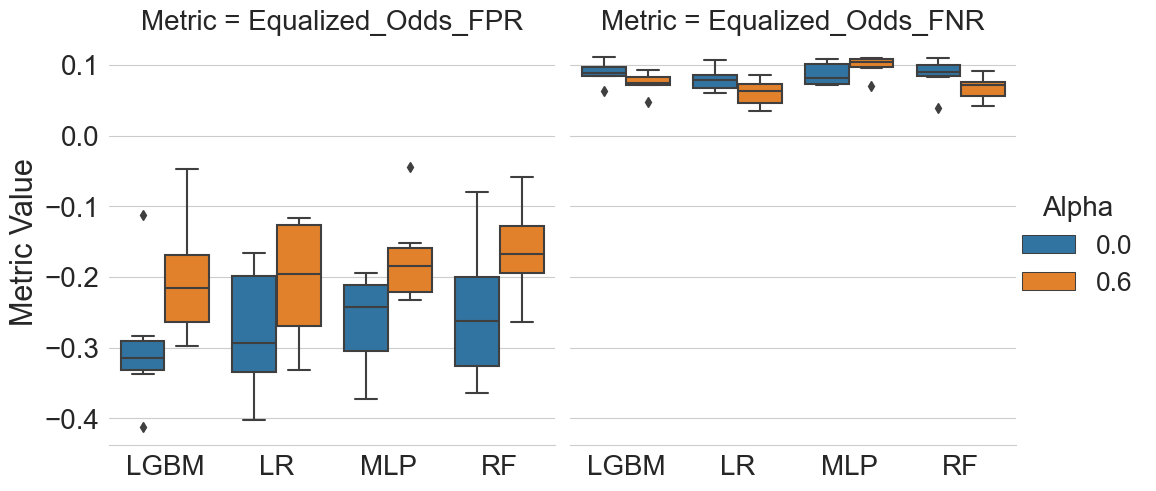

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 3. Scatter plots.

In [17]:
create_scatter_plot(melted_all_group_metrics_per_model_dct,
                    group='male',
                    fairness_metric_name='Equalized_Odds_FPR',
                    stability_metric_name='Label_Stability_Ratio')

alt.Chart(...)

In [18]:
create_scatter_plot(melted_all_group_metrics_per_model_dct,
                    group='male&race',
                    fairness_metric_name='Equalized_Odds_FPR',
                    stability_metric_name='Label_Stability_Ratio')

alt.Chart(...)

In [19]:
create_scatter_plot(melted_all_group_metrics_per_model_dct,
                    group='race',
                    fairness_metric_name='Equalized_Odds_FNR',
                    stability_metric_name='Label_Stability_Ratio')

alt.Chart(...)

## Figure 6. Responsible model selection

In [22]:
metrics_value_range_dct = {
    'Accuracy': [0.91, 0.93], # C1
    'Equalized_Odds_FPR': [-0.27, 0.0], # C2
    'Label_Stability': [0.92, 1.0], # C3
    'Label_Stability_Ratio': [0.95, 1.05], # C4
    'Accuracy&Equalized_Odds_FPR': None, # C1 + C2
    'Accuracy&Label_Stability': None, # C1 + C3
    'Accuracy&Label_Stability_Ratio': None, # C1 + C4
    'Accuracy&Equalized_Odds_FPR&Label_Stability&Label_Stability_Ratio': None, # C1 + C2 + C3 + C4
}
create_bar_plot_for_model_selection(melted_all_subgroup_metrics_per_model_dct,
                                    melted_all_group_metrics_per_model_dct,
                                    metrics_value_range_dct,
                                    group='race')

alt.Chart(...)